 # Ball detection notebook
 _by Paul-Emmanuel sotir_

In [42]:
import os
import sys
import shutil
import pprint as pp
import operator as op
import numpy as np
import pandas as pd
from skimage import io

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
from torch.utils.data import DataLoader

from importlib import reload

if '../src/balldetect' not in sys.path:
    sys.path.append('../src/balldetect')
import datasets
import torch_utils
reload(datasets)
reload(torch_utils)

# Torch configuration
use_gpu = torch.cuda.is_available()
cudnn.benchmark = use_gpu  # Enable inbuilt CuDNN auto-tuner TODO: measure preformances without this flag
cudnn.fastest = use_gpu  # Disable this if memory issues

In [43]:
dataset = datasets.BallsCFDetection("../datasets/mini_balls")
dl = DataLoader(dataset, batch_size=64, shuffle=True, pin_memory=use_gpu)

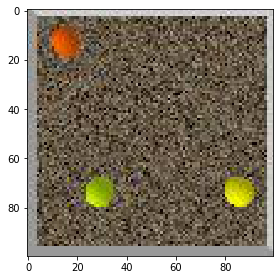

In [44]:
io.imshow(np.asarray(io.imread("../datasets/mini_balls/img_00000.jpg")))

##########  BALL DETECTION 3 HYPERPARAMETER SEARCH RESULTS  ##########
Hyperparameter search ran 41 trials. Best trial (30th trial) results:
Best_valid_loss=0.0031991 at epoch=82
Hyperparameters:
("{'architecture': {'act_fn': <class 'torch.nn.modules.activation.ReLU'>, "
 "'batch_norm': {'affine': True, 'eps': 1e-05, 'momentum': "
 "0.07359778246238029}, 'dropout_prob': 0.0, 'layers_param': (('conv2d', "
 "{'kernel_size': (3, 3), 'out_channels': 4, 'padding': 0}), ('conv2d', "
 "{'kernel_size': (3, 3), 'out_channels': 4, 'padding': 0}), ('conv2d', "
 "{'kernel_size': (3, 3), 'out_channels': 4, 'padding': 0}), ('avg_pooling', "
 "{'kernel_size': (2, 2), 'stride': (2, 2)}), ('conv2d', {'kernel_size': (5, "
 "5), 'out_channels': 16, 'padding': 0}), ('conv2d', {'kernel_size': (5, 5), "
 "'out_channels': 16, 'padding': 0}), ('avg_pooling', {'kernel_size': (2, 2), "
 "'stride': (2, 2)}), ('conv2d', {'kernel_size': (5, 5), 'out_channels': 32, "
 "'padding': 2}), ('conv2d', {'kernel_size': (7,

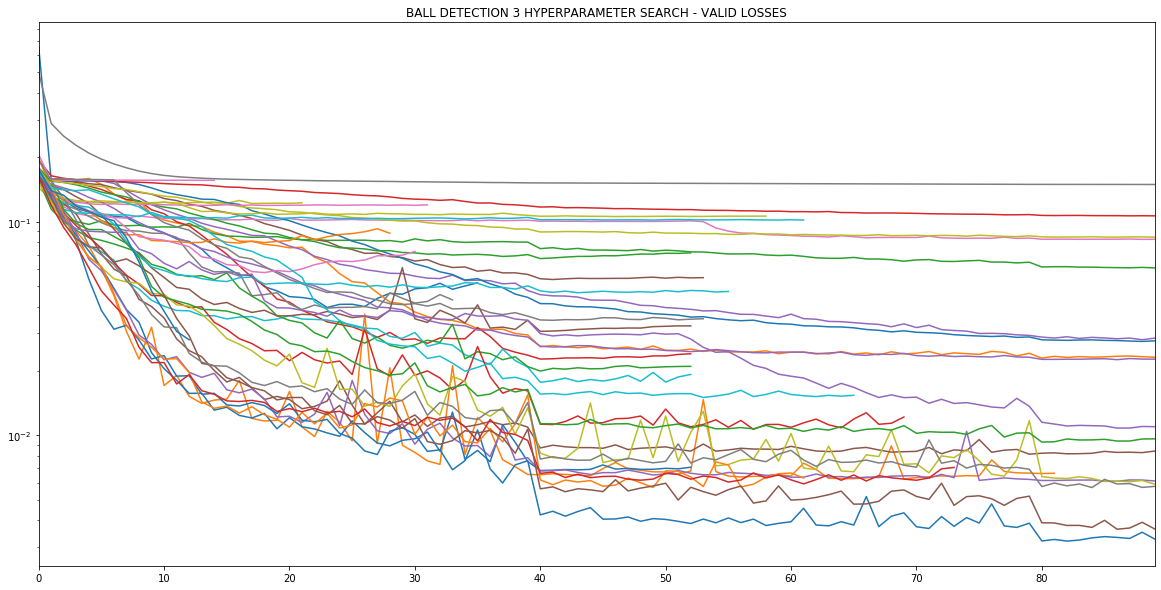

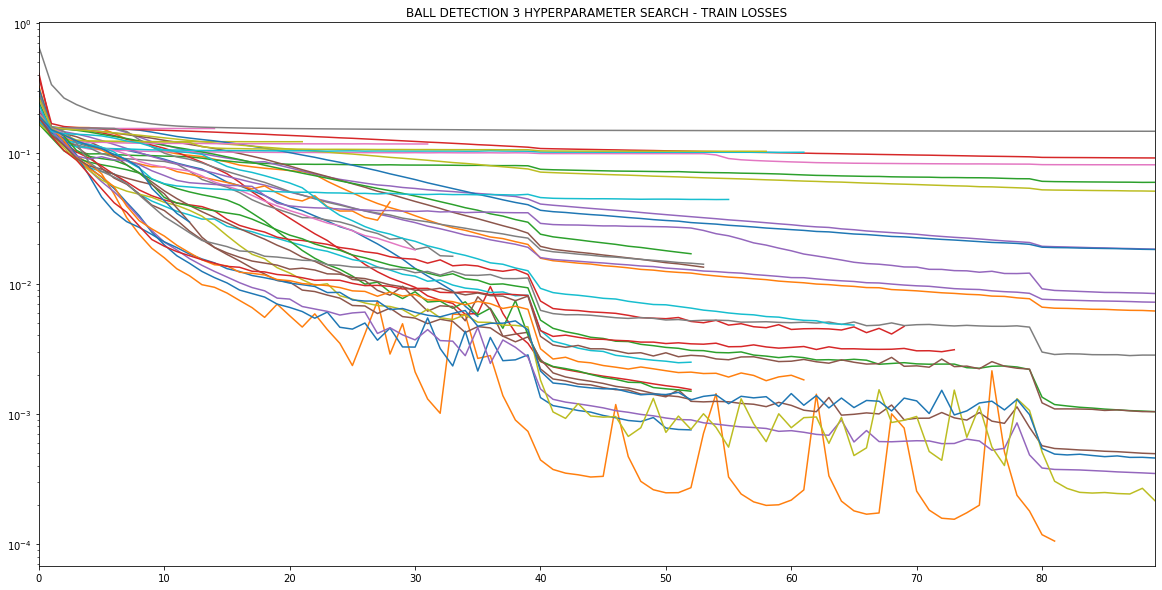

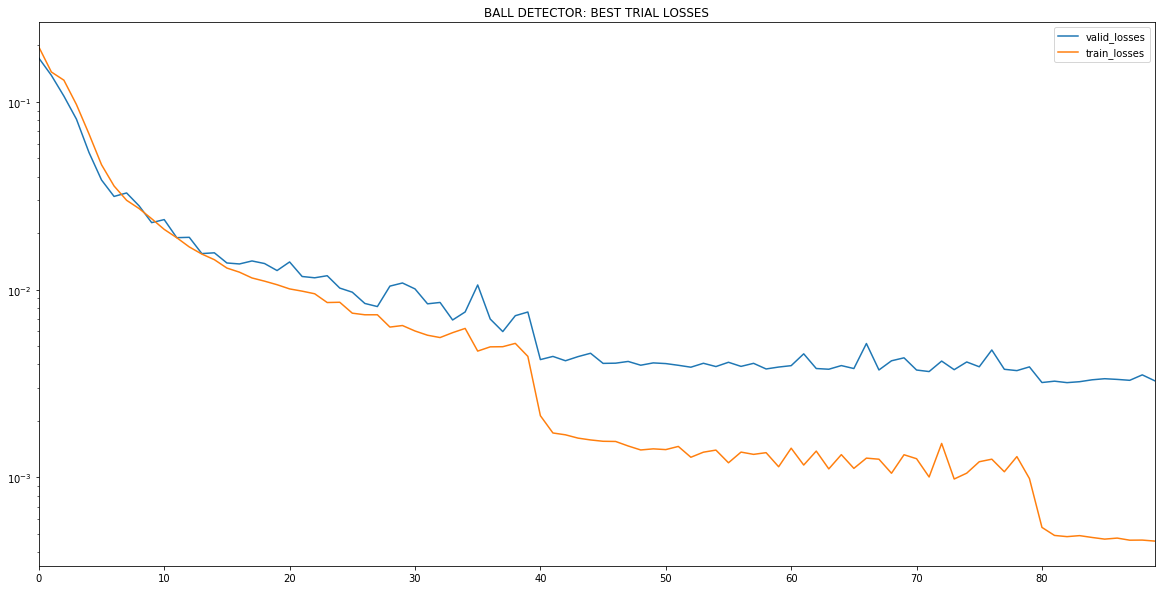

In [45]:
trials, best_idx, best_trial = torch_utils.extract_from_hp_search_log(r'../hp_search_logs/hp_detect3.log')
torch_utils.summarize_hp_search(trials, best_idx, hp_search_name='Ball detection 3')

,best_valid_losses
count,41.000000
mean,0.044614
std,0.043153
min,0.003199
25%,0.009298
50%,0.028005
75%,0.067190
max,0.156067


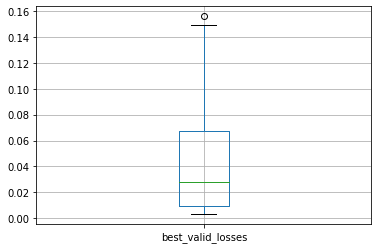

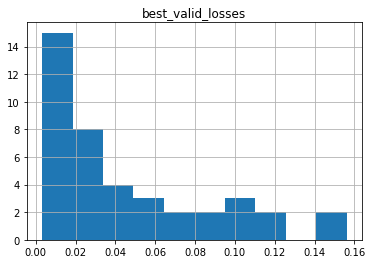

In [33]:
best_valid_losses = sorted([t['valid_losses'][t['best_epoch']] for t in trials])
df = pd.DataFrame({'best_valid_losses': best_valid_losses})
df.boxplot()
df.hist()
df.describe()